In [1]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

In [4]:
pip install --upgrade pytrends

Note: you may need to restart the kernel to use updated packages.


# Setup pytrend library and keyword definition

In [5]:
pytrends = TrendReq(hl='en-US',tz=180)
keyword = "data science"

# Data request

In [6]:
import time
from pytrends.request import TrendReq
from pytrends import exceptions
import random

pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['python', 'jupyter', 'data science']
retries = 5
base_delay = 10 # Start with a 10-second delay

for keyword in keywords:
    for attempt in range(retries):
        try:
            pytrend.build_payload(kw_list=[keyword], timeframe='today 5-y')
            data = pytrend.interest_over_time()
            print(f"Data for {keyword} retrieved successfully.")
            print(data)
            # Success, break the retry loop
            break
        except exceptions.TooManyRequestsError as e:
            print(f"Attempt {attempt + 1}: Received a 429 error for {keyword}.")
            # Calculate backoff delay with jitter
            delay = (base_delay ** (attempt + 1)) + random.uniform(0, 5)
            print(f"Waiting for {delay:.2f} seconds before retrying...")
            time.sleep(delay)
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
            break

C:\Python\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Data for python retrieved successfully.
            python  isPartial
date                         
2020-09-27      59      False
2020-10-04      59      False
2020-10-11      51      False
2020-10-18      54      False
2020-10-25      53      False
...            ...        ...
2025-08-24      70      False
2025-08-31      74      False
2025-09-07      71      False
2025-09-14      58      False
2025-09-21      57       True

[261 rows x 2 columns]


C:\Python\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Data for jupyter retrieved successfully.
            jupyter  isPartial
date                          
2020-09-27       57      False
2020-10-04       59      False
2020-10-11       52      False
2020-10-18       47      False
2020-10-25       46      False
...             ...        ...
2025-08-24       77      False
2025-08-31       78      False
2025-09-07       82      False
2025-09-14       72      False
2025-09-21       73       True

[261 rows x 2 columns]
Data for data science retrieved successfully.
            data science  isPartial
date                               
2020-09-27            29      False
2020-10-04            29      False
2020-10-11            26      False
2020-10-18            26      False
2020-10-25            25      False
...                  ...        ...
2025-08-24            83      False
2025-08-31            94      False
2025-09-07            82      False
2025-09-14            39      False
2025-09-21            38       True

[261 rows x 2 col

C:\Python\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [11]:
import socket
socket.gethostbyname('trends.google.com')


'172.217.174.68'

In [12]:
pytrends.build_payload([keyword], cat =0, timeframe = 'today 12-m' ,geo='', gprop='')

# countrywise interest

In [13]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword,ascending=False).head(15)

# graphs

C:\Users\Admin\AppData\Local\Temp\ipykernel_1468\1899135028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = region_data[keyword],


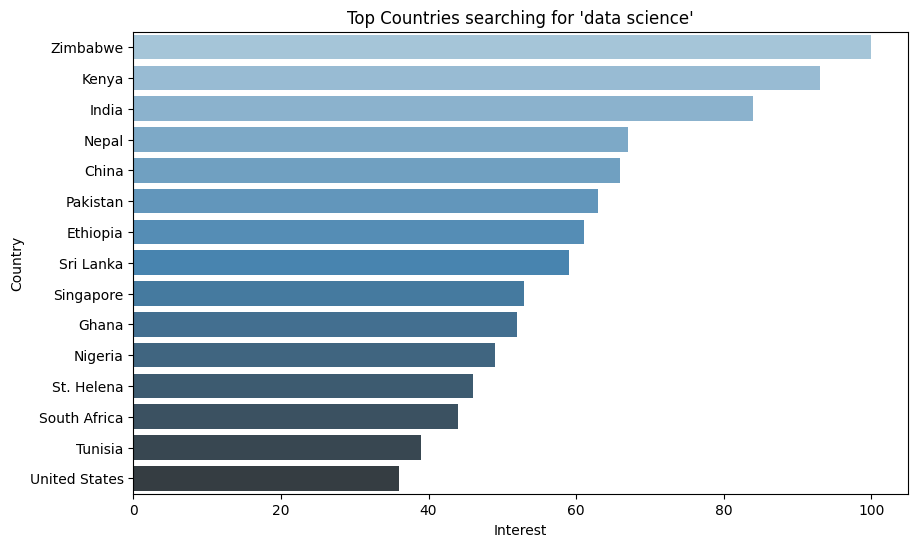

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x = region_data[keyword],
            y= region_data.index,
            palette="Blues_d")
plt.title(f"Top Countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

In [16]:
# World map

In [17]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1468\2405775006.py:2: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(region_data,


In [18]:
time_df = pytrends.interest_over_time() 

C:\Python\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



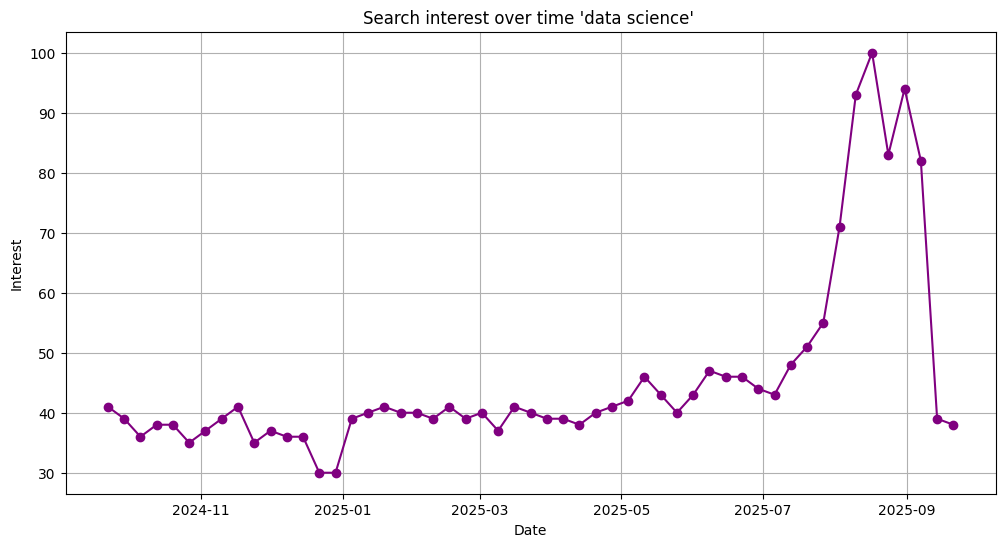

In [19]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker= 'o', color = 'purple')
plt.title(f"Search interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# multiple keywords comparison

In [20]:
kw_list = [keyword,"machine learning","artificial intelligence"]
pytrends.build_payload(kw_list,cat=0,timeframe = 'today 12-m' ,geo='' , gprop='')



C:\Python\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



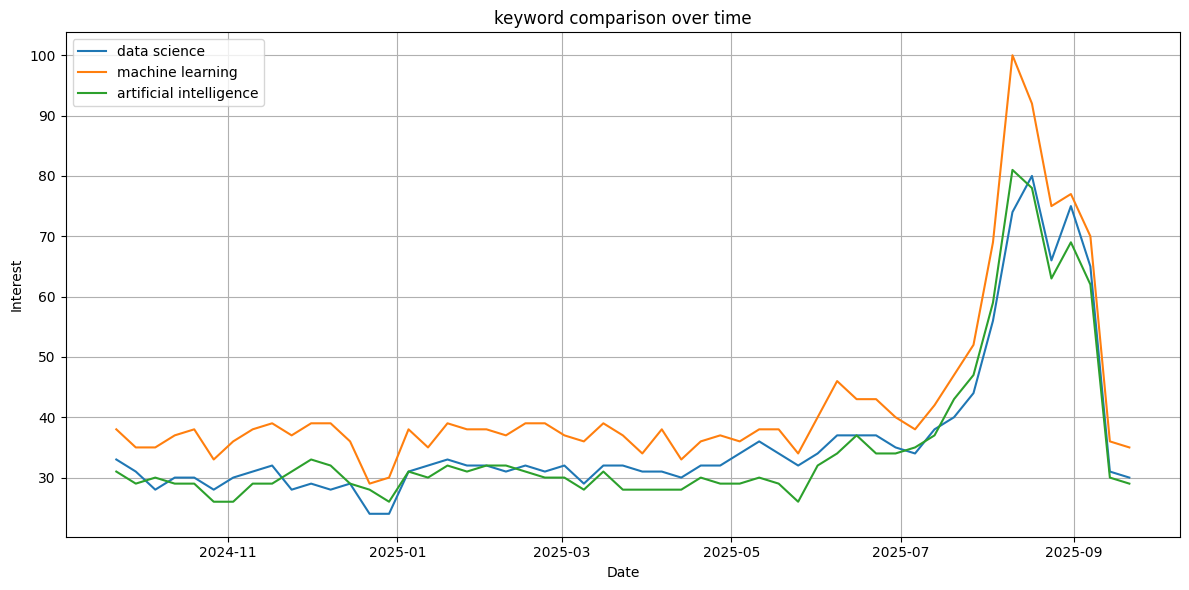

In [21]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index , compare_df[kw] , label=kw)


plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
!cd

C:\Users\Admin


In [8]:
import os

# Define the path
path = "C:/Users/Admin/Desktop/Projects"

# Create the folder if it doesn't exist
os.makedirs(path, exist_ok=True)

# Now change into it
os.chdir(path)

# Confirm you're there
!cd


C:\Users\Admin\Desktop\Projects


In [11]:
import os

# Add Git to the PATH for this session
os.environ['PATH'] += r";C:\Program Files\Git\cmd"

# Verify if Git is now recognized
!git --version


git version 2.51.0.windows.1


In [12]:
!git init

Initialized empty Git repository in C:/Users/Admin/Desktop/Projects/.git/


In [13]:
!git add .

In [15]:
!git commit -m "first commit"

[master (root-commit) b8af3c6] first commit
 2 files changed, 3290 insertions(+)
 create mode 100644 Google_data_Trends_analysis.ipynb
 create mode 100644 Website_Data_Analysis.ipynb


In [16]:
!git branch -M main

In [17]:
!git remote add origin https://github.com/igituser007/Google_trends_analysis.git

In [18]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.


To https://github.com/igituser007/Google_trends_analysis.git
 * [new branch]      main -> main
